In [2]:
#importandoa as biblioetcas usadas para a preparação dos dados e predição
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#importando as biblioteca da api
from nba_api.stats.static import teams
from nba_api.stats.endpoints import leaguegamefinder
#buscando todos os jogos
result = leaguegamefinder.LeagueGameFinder()
todosJogos = result.get_data_frames()[0]

In [4]:
#tranformando os dados da api em um dataframe
df = pd.DataFrame(todosJogos)
df.info

<bound method DataFrame.info of       SEASON_ID     TEAM_ID TEAM_ABBREVIATION            TEAM_NAME  \
0         22019  1610612754               IND       Indiana Pacers   
1         22019  1610612746               LAC          LA Clippers   
2         22019  1610612758               SAC     Sacramento Kings   
3         22019  1610612739               CLE  Cleveland Cavaliers   
4         22019  1610612759               SAS    San Antonio Spurs   
...         ...         ...               ...                  ...   
29995     22012  1610612755               PHI   Philadelphia 76ers   
29996     22012  1610612745               HOU      Houston Rockets   
29997     22012  1610612740               NOH  New Orleans Hornets   
29998     22012  1610612748               MIA           Miami Heat   
29999     22012  1610612758               SAC     Sacramento Kings   

          GAME_ID   GAME_DATE      MATCHUP WL  MIN  PTS  ...  FT_PCT  OREB  \
0      0021900085  2019-11-03  IND vs. CHI  W  24

In [20]:
#retirando os dados que nao sera usado na api
df.drop(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID','GAME_DATE', 'MATCHUP'], axis=1, inplace=True)
df.head()

,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,W,238,115,41,89,0.461,13,38,0.342,20,...,0.800,10,41,51,30,4,7,11,22,10.0
1,L,242,101,39,93,0.419,7,33,0.212,8,...,0.444,11,37,48,16,16,3,17,32,-5.0
2,W,241,115,41,90,0.456,15,37,0.405,18,...,0.783,8,36,44,20,8,11,12,20,11.0
3,W,239,106,33,81,0.407,16,41,0.390,15,...,0.625,9,41,50,17,9,1,24,36,5.0
4,W,240,129,54,107,0.505,11,33,0.333,10,...,0.833,13,33,46,36,11,8,11,23,1.0


In [21]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['WL'] = pd.get_dummies(df['WL'])

In [22]:
#importando para separar dos dados de teste e de treino
from sklearn.model_selection import train_test_split

In [23]:
#separando a base de dados
x = df.drop('WL',axis=1)
x = x.fillna(x.mean())
y = df['WL']
y = y.fillna(y.mean())

In [24]:
#separando os dados de treino de teste sendo 40% para teste e 60% para treino e escolhedo o um random 
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size=0.3,random_state=101)
aux = y_teste.reset_index()
aux.drop('index',axis=1,inplace=True)

In [25]:
#importando o algoritmo de arvore de decisão
from sklearn.svm import SVC
#gamma='auto'; gamma='scale'
svc = SVC(gamma='auto')

In [26]:
svc.fit(x_treino,y_treino)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [27]:
predicao = svc.predict(x_teste)

Text(0, 0.5, 'Y valor predito')

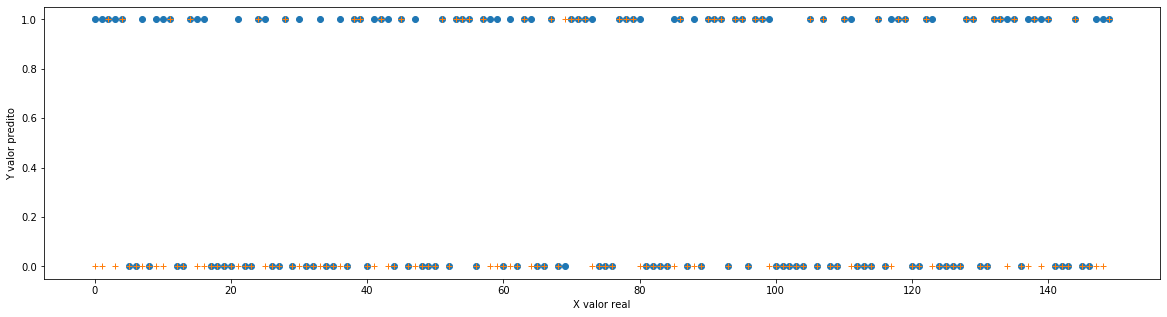

In [28]:
plt.figure(figsize=(20,5))
plt.plot(aux[:150], 'o')
plt.plot(predicao[:150], '+')
plt.xlabel('X valor real')
plt.ylabel('Y valor predito')

In [29]:
from sklearn import metrics
#MAE é o mais fácil de entender, porque é o erro médio.
#MSE é mais popular que o MAE, porque a MSE "puniria" erros maiores, o que tende a ser útil no mundo real.
#RMSE é ainda mais popular do que MSE, porque o RMSE é interpretável nas unidades "y".
print('MAE:', metrics.mean_absolute_error(y_teste, predicao))
print('MSE:', metrics.mean_squared_error(y_teste, predicao))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_teste, predicao)))

MAE: 49.163777777777774
MSE: 0.19822222222222222
RMSE: 0.44522154285504


In [30]:
print('Variance score: %.2f' % svc.score(x_teste,aux))

Variance score: 0.80


In [ ]:
#fazendo a predicao usando cross-valodation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svc,x,y, cv=10)

In [ ]:
print('Variance Cros-Validation rscore: %.2f' % max(scores))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_teste,predicao))

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_teste,predicao))

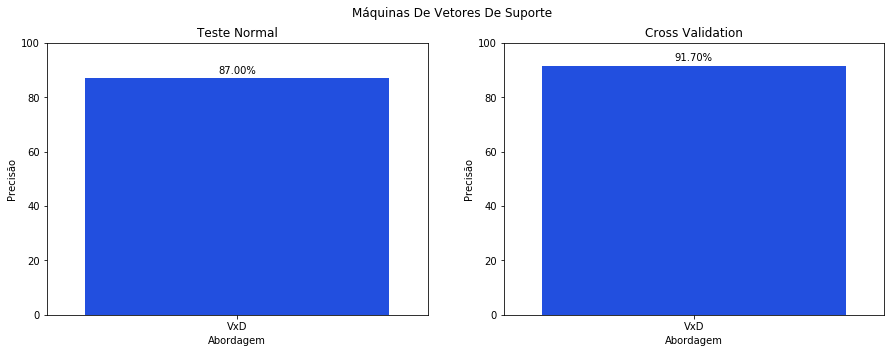

In [4]:
plt.figure(figsize=(15,5))
plt.suptitle('Máquinas De Vetores De Suporte')

plt.subplot(1, 2, 1)
plt.title("Teste Normal")

graph = sns.barplot(x=['VxD'], y=[87],palette='bright')
for p in graph.patches:
    graph.annotate(format(p.get_height(), '.2f') + "%", (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')
plt.xlabel("Abordagem")
plt.ylabel("Precisão")
plt.ylim([0, 100])

plt.subplot(1, 2, 2)
plt.title("Cross Validation")
graph2 = sns.barplot(x=['VxD'], y=[91.7],palette='bright')
for p in graph2.patches:
    graph2.annotate(format(p.get_height(), '.2f') + "%", (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')
plt.xlabel("Abordagem")
plt.ylabel("Precisão")
plt.ylim([0, 100])
plt.savefig('img/SVMAPI.png')